# CHALLENGE: HUGO CALERO AND RAÚL LÓPEZ 

## WARNING: 
**The first part of the notebook contains hisotgrams that use information obtained after calling the function. For this reason, it will give errors at first, but after having called the functions and the decisor, running the code corresponding to the inital explanation again, will make the histograms appear correctly.**

**---------------------------------------------------------------------------------------------------------------------------**


# RUN HERE


**---------------------------------------------------------------------------------------------------------------------------**

In [47]:
### The first step is to import the necessary libraries and modules from python that we will need to carry on the code.

%matplotlib inline

%load_ext autoreload
%autoreload 2

%matplotlib inline

import statistics

import os
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import scipy.signal as sg

from scipy.signal import find_peaks
import scipy.signal as sc

import numpy as np
from scipy import signal
from signal_processing_tools import *

from scipy.signal import spectrogram

### The variable t represents a time vector that has a length equal to the sample size of the signals.
t = np.linspace(0,60*5,15000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
### The following functions are the ones used to obtain the signals, separated by axis (x or y) and also separating those 
### signals of the right foot and the left hip.

def get_features_one_subject_x_pd(sub_id):
    
    #Get inside subjet folder
    right_foot = np.loadtxt(sub_id+'\\PD.txt',skiprows=1)
    
    signal = right_foot[:,0] #x axis
    
    return signal[:15000]

def get_features_one_subject_y_pd(sub_id):
    
    #Get inside subjet folder
    right_foot = np.loadtxt(sub_id+'\\PD.txt',skiprows=1)
    
    signal = right_foot[:,1] #y axis
    
    return signal[:15000]

def get_features_one_subject_x_ci(sub_id):
    
    #Get inside subjet folder
    right_foot = np.loadtxt(sub_id+'\\CI.txt',skiprows=1)
    
    signal = right_foot[:,0] #x axis
    
    return signal[:15000]

def get_features_one_subject_y_ci(sub_id):
    
    #Get inside subjet folder
    right_foot = np.loadtxt(sub_id+'\\CI.txt',skiprows=1)
    
    signal = right_foot[:,1] #y axis
    
    return signal[:15000]

In [6]:
### To get the signals we will need for the analysis, we give use to the previously mentioned functions, and store them in 
### different lists (X_pd, Y_pd, X_ci, Y_ci)

pwd = os.getcwd()
path = 'C:\\Users\\Hugo\\DESKTOP\\TERCERO\\Segundo\\PSP\\CHALLENGE\\Data\\Training\\'
os.chdir(path)

import glob

subjects = os.listdir()

print(subjects)

X_pd = []
Y_pd = []
X_ci = []
Y_ci = []

### In our paarticular case when printing the variable "subjects", we obtain an unwanted value ("ipynb_checkpoints"), so we
### corrected this error by incluidng the indexing [1:], so that it does not consider the first value of the list.

for sub in subjects[1:]:
    
    signal_x_pd = get_features_one_subject_x_pd(sub)
    signal_y_pd = get_features_one_subject_y_pd(sub)
    signal_x_ci = get_features_one_subject_x_ci(sub)
    signal_y_ci = get_features_one_subject_y_ci(sub)

    X_pd.append(signal_x_pd)
    Y_pd.append(signal_y_pd)
    X_ci.append(signal_x_ci)
    Y_ci.append(signal_y_ci)

    
X_pd = np.array(X_pd)
Y_pd = np.array(Y_pd)
X_ci = np.array(X_ci)
Y_ci = np.array(Y_ci)

['.ipynb_checkpoints', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '7', '8', '9']


In [7]:
subjectos = subjects[1:]
subjectos = np.asarray(subjectos,dtype = int)
sorted_idx = np.argsort(subjectos)
subjects_s = subjectos[sorted_idx]

print(subjects_s)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]


In [8]:
X_pd = X_pd[sorted_idx,:]
Y_pd = Y_pd[sorted_idx,:]
X_ci = X_ci[sorted_idx,:]
Y_ci = Y_ci[sorted_idx,:]

Our approach to develop the classification of the accelerometer signals is done by considering several variables or features that we have studied on the training signals. These features are then used to create the Naive-Bayes decisor that we will apply to the test signals. The function is defined below, but we will explain each part independently beforehand, inlcuidng not only the characteristics or features that we end up using, but also those that we tried to analyse, but thought that they were not useful, indicating the reasoning behind this decisions.

**---------------------------------------------------------------------------------------------------------------------------**


# STOP HERE


**---------------------------------------------------------------------------------------------------------------------------**

# 1) OBTAINING THE SIGNALS

As we can see in the following cell of code, we have obtained the necessary information about the signals we were given. In order to study them correctly, we have defined a time vector, with length equal to the signals´ samples (15000 = 60*5). Moreover, the information has been divided into 3 parts, corresponding to the x,y and z axis (we will be focusing on the x axis), both in the signals corresponding to PD and CI.
In order to use visualization, it has been stablished the value of "señal" to be equal to 2, just as an example.
To define the path we use the variable named "señal" that is going to be the argument of the function we have developed.

(0.0, 20.0)

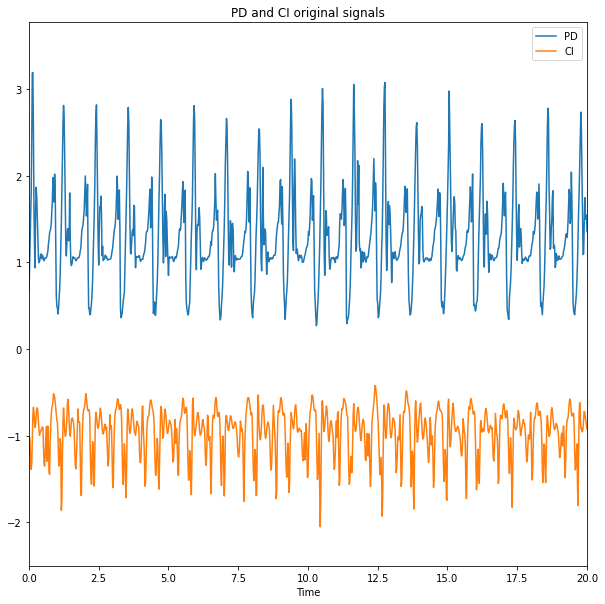

In [19]:
señal = 2
p1 = 'C:\\Users\\Hugo\\DESKTOP\\TERCERO\\Segundo\\PSP\\CHALLENGE\\Data\\Training\\'
p2 = '\\PD.txt'
p3 = '\\CI.txt'
pathpd = p1+str(señal)+p2
pathci = p1+str(señal)+p3
PD = np.loadtxt(pathpd)
CI = np.loadtxt(pathci)

t = np.linspace(0,60*5,15000) 

### Here we split the signals (PD and CI into the different axis, and we include the X one in a list, as it is this axis the one
### in which we will be starting the analysis.
x = []
for i in PD :
    np.split(i,3)
    x.append(i[0]) 

y = []
for i in CI :
    np.split(i,3)
    y.append(i[0])

plt.figure(figsize=[10,10])
plt.plot(t,x,label="PD") 
plt.plot(t,y,label="CI")
plt.xlabel('Time')
plt.title('PD and CI original signals')
plt.legend()
plt.xlim(0,20)

# 2) PREPROCESSING

To prepare the signal for the posterior analysis, we have decided to use several methods of processing, being these the smooth filter and a band-pass (between the frequencies 0.3 and 4.1, that are the frequencies that enclose the dominant frequencies of the signals, as we can see from the plot of the periodogram). By using these kind of filters we can remove noise and focus better on the parts of the signal in which we are interested. Apart from removing the noise, we also remove the spectral components that we consider to be redundant, such as the harmonic frequencies, baseline wonders, and powerline interferences.

As in the future we will be using the value of the dominant frequency we proceed to apply the find_peaks function of python, with which we obtain the amplitude of such frequency as well as its value. This peak is also represented in the plot of the periodograms (both for PD and CI).

In [48]:
### For our approach, the smooth filter is particularly useful, as it will permit us to define the peaks of the signals more
### precisely, as they will look similar to a sinusoid signal, removing unnecesary information for the detection of peaks.
PD_s = (smooth(x,window_len=10,window='flat'))
CI_s = (smooth(y,window_len=10,window='flat'))

### For the creation of the bandpass filter we are going to use, we not only inlcude the parameter corresponding to the cut 
### frequencies, but also the pass_zero parameter, equaling it to False, as if not, it will not work as a bandpass filter
### correctly
b_bp= signal.firwin(64,[0.3, 4.1],pass_zero=False,fs=50)     
PD_sbp = signal.filtfilt(b_bp,1,PD_s)         
CI_sbp = signal.filtfilt(b_bp,1,CI_s) 

wbp, hbp = sg.freqz(b_bp, fs=50)
### To study the Spectral Density of the signal, we use the welch periodogram, using the hamming window. 
PSD_welchnxpd = []   
f_welch, Pxx_welch = signal.welch(PD_sbp,window ='hamming',nperseg = 128 ,nfft = 1024, fs = 50)   
PSD_welchnxpd.append(Pxx_welch)    
PSD_welchnxpd = np.array(PSD_welchnxpd)
### By using the find_peaks function we will later be able to determine the exact value of the dominant frequency, that will be
### necessary later on.
peaksperiod,_ = find_peaks(PSD_welchnxpd[0])

PSD_welchnxci = []   
f_welch, Pxx_welch = signal.welch(CI_sbp,window ='hamming',nperseg = 128 ,nfft = 1024, fs = 50)   
PSD_welchnxci.append(Pxx_welch)    
PSD_welchnxci = np.array(PSD_welchnxci) 
peaksperiodci,_ = find_peaks(PSD_welchnxci[0])

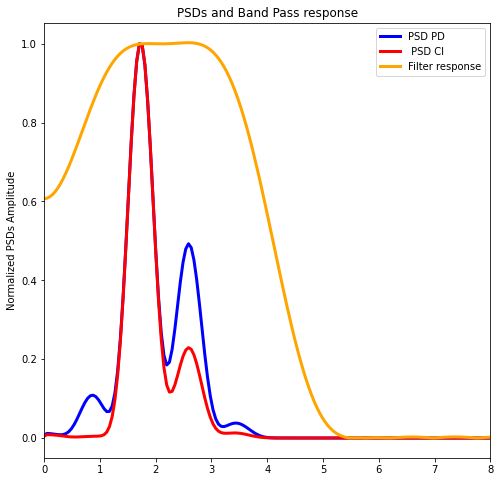

In [64]:
# Comparison between PSDs and filter response
plt.figure(figsize = (8,8))

plt.plot(f_welch,PSD_welchnxpd.T/np.max(PSD_welchnxpd.T),linewidth = 3, color = 'blue', label = 'PSD PD') 
plt.plot(f_welch,PSD_welchnxci.T/np.max(PSD_welchnxci.T),linewidth = 3, color = 'red', label = ' PSD CI') 
plt.plot(wbp,abs(hbp),linewidth = 3, color = 'orange', label = 'Filter response')

plt.ylabel('Normalized PSDs Amplitude')
plt.title('PSDs and Band Pass response')
plt.xlim(0,8)
plt.legend()

# 3) ANALYSIS

The first step to start the study of the signals is to obtain the frequency matching the maximum value of the periodogram, the **dominant frequency**. The code used to do so is the one in the following cell. This value is of relevance for our algorithm as we will use it to propose some restrictions while studying the peaks of the preprocessed signals. These restrictions permit us to study them more precisely and find a solution to possible errors.

In [22]:
### we zip the frequencies and the amplitudes of them, to have a "list" of tuples containing each frequency of the PSD, with its
### corresponding amplitude.
a = zip(f_welch,PSD_welchnxpd.T)
k= []
### the dominant frequency will be the one that has the highest amplitude, so we search for this amplitude in the zip, and store
### the frequency matching to that amplitude in a new variable = k
for i,e in a:
    if e == max(PSD_welchnxpd.T):
        k.append(i)

b = zip(f_welch,PSD_welchnxci.T)
j= []
for i,e in b:
    if e == max(PSD_welchnxci.T):
        j.append(i)
        
print('The dominant frequency for PD in this signal is = ', k[0], 'Hz')
print('The dominant frequency for CI in this signal is = ', j[0], 'Hz')

The dominant frequency for PD in this signal is =  1.708984375 Hz
The dominant frequency for CI in this signal is =  1.708984375 Hz


Having obtained the value for the dominant frequency we will proceed to study the peaks of the signals. Our hypothesis is that in those patients carrying a weight or being under the placebo group, the **DIFFERENCE OF TIMES BETWEEN THE PEAKS** corresponding to right foot and left hip will be less regular than the difference in patients walking in normal conditions. This should occur, as when carrying no weight it is intuitive that the left hip and right foot will be completelly dephased, whereas when carrying a certain weight, movements should be more irregular.

The condition applied to the find_peaks function is related to the minimum distance that there should be between steps. This mentioned distance is calculated from the dominant frequency, and doing so we prevent the detection of spurious peaks.

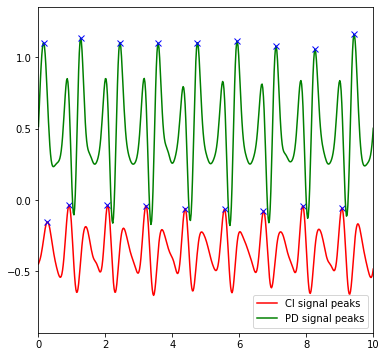

In [23]:
### To calculate the minimum distance that there should be between the detected peaks, we use the following formula, that 
### considers both the dominant frequency and the number of samples per second (50). As we can see in the plot , we will only
### be considering the higher peaks (with some exceptions that we correct afterwards) thanks to this restriction.
Dpd = (1/(k[0]))*50
Dci = (1/(j[0]))*50
peakspd,_ = find_peaks(PD_sbp,distance=Dpd)
peaksci,_ = find_peaks(CI_sbp,distance=Dci)

plt.figure(figsize = [6,6])
plt.plot(t,CI_sbp, color = 'red', label = 'CI signal peaks')
plt.plot(t[peaksci],CI_sbp[peaksci],'x',color = 'blue')

plt.plot(t,PD_sbp, color = 'green', label = 'PD signal peaks')
plt.plot(t[peakspd],PD_sbp[peakspd],'x',color = 'blue')
plt.xlim(0,10)
plt.legend()
plt.show()

As we want to prevent the utilization of peaks of low amplitude, that are not of interest we decided to include another restriction. This restriction consists on taking only the peaks that have an amplitude over the one formed from substracting the standard deviation of the amplitude of the obtained peaks to the mean of them. In this way we take out any possible outliers.

In [24]:
### we store the amplitude of each peak in a list and then create another zip, containing the samples where the peaks are 
### located, tupled with their amplitudes.
amplitudespd = []
for e in peakspd:
    amplitudespd.append(PD_sbp[e])

timeamppd = zip(amplitudespd,peakspd)    

### from the previous zip, we will store the values of the sample location of those peaks that fulfil the restriction mentioned 
### beforehand. In this way we wnd up having a list of sample instants, where each peak that can be interesting is stored. This
### list is realamppd for PD signals, and realampci for CI signals.
realamppd = []
for e,i in timeamppd:
    if statistics.mean(amplitudespd) - statistics.stdev(amplitudespd) < e:
        realamppd.append(i)

amplitudesci = []
for e in peaksci:
    amplitudesci.append(CI_sbp[e])

timeampci = zip(amplitudesci,peaksci)    

realampci = []
for e,i in timeampci:
    if statistics.mean(amplitudesci) - statistics.stdev(amplitudesci) < e:
        realampci.append(i)

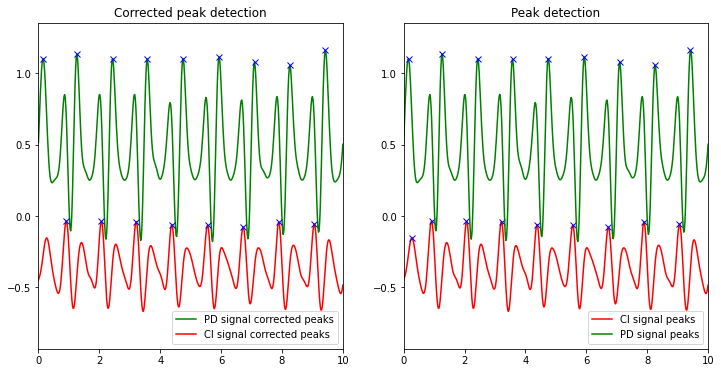

In [25]:
### we plot the time signals (smoothedd and band-passed) with each peak marked with an x.
plt.figure(figsize = [12,6])

plt.subplot(1,2,1)
plt.plot(t,PD_sbp, color = 'green', label = 'PD signal corrected peaks')
plt.plot(t[realamppd],PD_sbp[realamppd],'x',color = 'blue')    
plt.plot(t,CI_sbp, color = 'red', label = 'CI signal corrected peaks')
plt.plot(t[realampci],CI_sbp[realampci],'x',color = 'blue')
plt.title('Corrected peak detection')
plt.xlim(0,10)
plt.legend()

plt.subplot(1,2,2)
plt.plot(t,CI_sbp, color = 'red', label = 'CI signal peaks')
plt.plot(t[peaksci],CI_sbp[peaksci],'x',color = 'blue')
plt.plot(t,PD_sbp, color = 'green', label = 'PD signal peaks')
plt.plot(t[peakspd],PD_sbp[peakspd],'x',color = 'blue')
plt.title('Peak detection')
plt.xlim(0,10)
plt.legend()

plt.show()

We can clearly see the impact of our restriction for example in the red signal (corresponding to CI) where, after having imposed the conditions, it no longer considers the first peak, that is too low to be meaningful.

After having corrected the detection of the peaks that are interesting to us, we proceed to study the differences in time between the peaks of PD and CI. To do so, we define two lists, that are going to obtain the time values for each of the corrected peaks.

Furthermore, as it is possible that due to uncontrollable phenomena the number of peaks for PD and CI might be different for the same person (although it is intuitive that they should coincide), we add zeros to the list that contains the least amount of values. These zeros will not have especial relevance but are needed to be able to do some calculations.

In [26]:
### Using the sample location of the peaks, we can obtain the time instant where each of them are located, and store them in
### the lists pdtimes and citimes.

pdtimes = []
citimes = []

for i in realamppd:
    pdtimes.append(t[i])
for i in realampci:
    citimes.append(t[i])

if len(citimes) > len(pdtimes):
    for i in range (0, (len(citimes) - len(pdtimes))):
        pdtimes.append(0)

if len(pdtimes) > len(citimes):
    for i in range (0, (len(pdtimes) - len(citimes))):
        citimes.append(0)

Now that we have the values of time corresponding to each peak, we study the differences in time between the list corresponding to the peaks of PD and that of CI, to analyze the mean of these differences, as well as the standard deviation for each group.

In [27]:
### In the following loop, we create a list (listddd) where for each value of pdtimes, we will include the substraction of that 
### value and each value of citimes. In this way, listddd is a list of shape = (lenght of pdtimes x length of citimes).
### From this list, that by its own is not very useful, we will get only the important values. To do so, we select the minimum 
### value and its index from listddd, for every element of pdtimes. By doing so, we will be obtaining the time instant of every 
### peak from the CI signal that is the closest to each time instant of the peaks of PD. This values are then going to be stored
### in the lists pdtimesez and citimesez, that we will substract, to obtain the definitive list of the time differences between
### corresponding peaks of the left hip and right foot.
pdtimesez = []
citimesez = []

for e in pdtimes:
    listddd = []
    for i in citimes:
        listddd.append(np.abs(e - i))
    val, idx = min((val, idx) for (idx, val) in enumerate(listddd))
    citimesez.append(citimes[idx])
    pdtimesez.append(e)
    
differentimesez = [np.abs(a_i - b_i) for a_i, b_i in zip(pdtimesez, citimesez)]

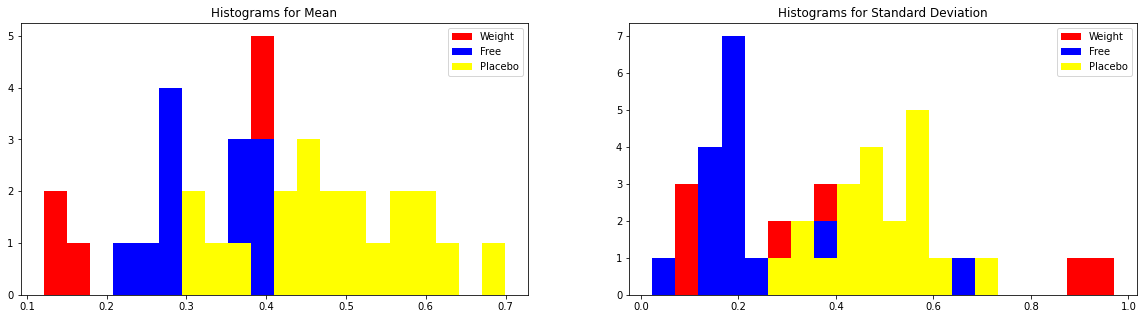

In [74]:
### From the differences list, we obtain the mean and variance of this time differences. With the function defined below, we did
### it for the 60 training signals, and computed the histograms separated in the 3 corresponding groups.

### For every histogram in the notebook we have followed the same methodology. We concatenate the 3 lists obtained from the 
### function, and use the maximum and minimum values to define the range of this histograms, so they are all similar in width.
### Moreover, to prevent having very wide bins in the histograms, we predefine them to be divided in 20.

conc = weightmean+freemean+pmean
concs = weightstd+freestd+pstd

plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
plt.hist(weightmean, color = 'red',stacked=True, range = (min(conc), max(conc)), bins = 20, label = 'Weight')
plt.hist(freemean, color = 'blue',stacked=True, range = (min(conc), max(conc)), bins = 20, label = 'Free')
plt.hist(pmean, color = 'yellow',stacked=True, range = (min(conc), max(conc)), bins = 20, label = 'Placebo')
plt.title('Histograms for Mean')
plt.legend()

plt.subplot(1,2,2)
plt.hist(weightstd, color = 'red',stacked=True, range = (min(concs), max(concs)), bins = 20, label = 'Weight')
plt.hist(freestd, color = 'blue',stacked=True, range = (min(concs), max(concs)), bins = 20, label = 'Free')
plt.hist(pmean, color = 'yellow',stacked=True, range = (min(concs), max(concs)), bins = 20, label = 'Placebo')
plt.title('Histograms for Standard Deviation')
plt.legend()
plt.show()

From the previous histograms, we can see clear differences between groups, specially in the standard deviation of the differences between peak times of CI and PD. This agrees with our hypothesis that the variablity should be different between groups, and these features are going to be the basis of our decisor.

- Another feature that we tried to study was the **SPECTRAL DEENSITY OF ACCELERATION** (the area enclosed by the periodogram) of the signal of the right foot for each subject. As wee can see from the following histogram, differences are clear between the weight group (in red), but the distinction of the placebo and free groups is not as clear.

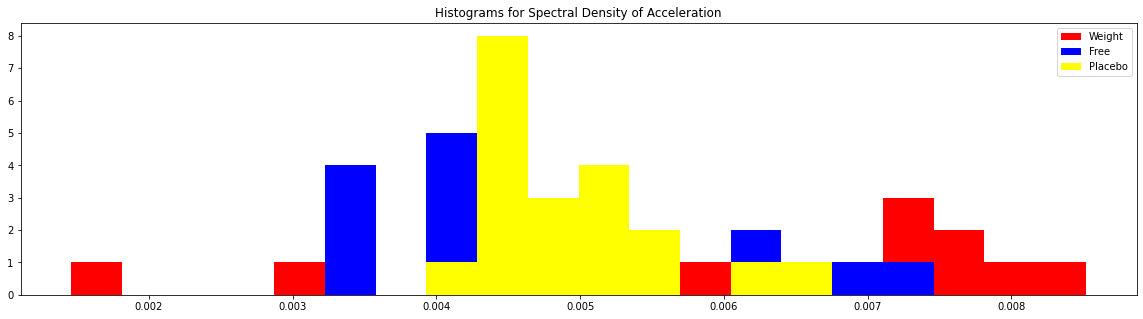

In [68]:
### To obtain this value, we simply divide the sum of all the amplitudes of the periodogram by the total number of frequencies.
powa = sum(PSD_welchnxpd.T)/len(PSD_welchnxpd.T)

### For the histogram
concp = wpowa+fpowa+ppowa

plt.figure(figsize=[20,5])

plt.hist(wpowa, color = 'red',stacked=True, range = (min(concp), max(concp)), bins = 20, label = 'Weight')
plt.hist(fpowa, color = 'blue',stacked=True, range = (min(concp), max(concp)), bins = 20, label = 'Free')
plt.hist(ppowa, color = 'yellow',stacked=True, range = (min(concp), max(concp)), bins = 20, label = 'Placebo')
plt.title('Histograms for Spectral Density of Acceleration')
plt.legend()

- When trying to find more features that could be interesting for the classification of the signals, we decided lo look at the **SPECTROGRAMS** of the mean signal for each group obtained from the 60 trainig signals. To do so, we averaged the 20 signals for each group and computed the spectrogram of these means. Initially, just by visual inspection, we can see a difference in the frequency interval ranging from 5 to 10 Hz approximatelly. 

Text(0.5, 0, 'Time [sec]')

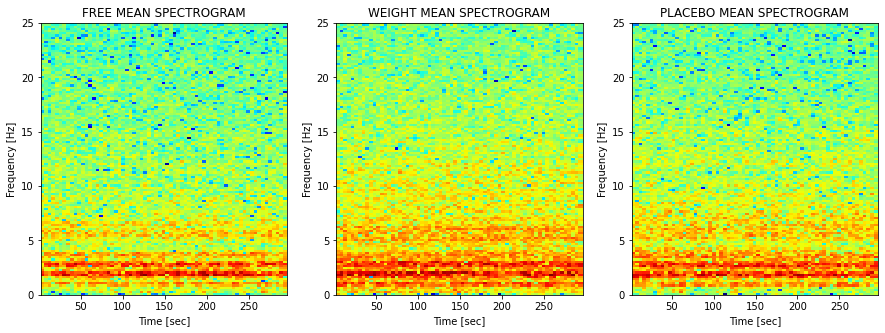

In [65]:
### OBTAINING THE MEAN SIGNALS FOR THE DIFFERENT GROUPS
listfree = [2,5,6,9,11,12,14,24,25,26,29,31,34,36,37,38,39,53, 58, 59]   
listx_pd = []
meanx_pd_free = []
listx_ci = []
meanx_ci_free = []
for i in range(0,15000):                
    for k in listfree:             
        a = X_pd[k,:]
        listx_pd.append(a[i])
        b = X_ci[k,:]
        listx_ci.append(b[i])
    meanx_pd_free.append(sum(listx_pd)/(len(listx_pd)))
    listx_pd = []
    meanx_ci_free.append(sum(listx_ci)/(len(listx_ci)))
    listx_ci = []

    
listweight = [1, 3, 7,13,16,17,19,20,22,23,28,30,33,35,41,45,48,50,54,57]   
listx_pd = []
meanx_pd_weight = []
listx_ci = []
meanx_ci_weight = []
for i in range(0,15000):                
    for k in listweight:             
        a = X_pd[k,:]
        listx_pd.append(a[i])
        b = X_ci[k,:]
        listx_ci.append(b[i])
    meanx_pd_weight.append(sum(listx_pd)/(len(listx_pd)))
    listx_pd = []
    meanx_ci_weight.append(sum(listx_ci)/(len(listx_ci)))
    listx_ci = []

    
listplacebo = [0,4,8,10,15,18,21,27,32,40,42,43,44,46,47,49,51,52,55,56]  
listx_pd = []
meanx_pd_placebo = []
listx_ci = []
meanx_ci_placebo = []
for i in range(0,15000):                
    for k in listplacebo:           
        a = X_pd[k,:]
        listx_pd.append(a[i])
        b = X_ci[k,:]
        listx_ci.append(b[i])
    meanx_pd_placebo.append(sum(listx_pd)/(len(listx_pd)))
    listx_pd = []
    meanx_ci_placebo.append(sum(listx_ci)/(len(listx_ci)))
    listx_ci = []

    
### COMPUTING THE SPECTROGRAMS FOR THE MEAN. With using this value for the nperseg parameter, we obtain a good relation between
### the time and spectral resolution, that is necessary for the calculations we will be doing later.
F = np.array(meanx_pd_free)
f1, tt1, Sxx1 = spectrogram(F, fs = 50, nperseg = 250)
    
W = np.array(meanx_pd_weight)
f2, tt2, Sxx2 = spectrogram(W, fs = 50, nperseg = 250)
    
P = np.array(meanx_pd_placebo)
f3, tt3, Sxx3 = spectrogram(P, fs = 50, nperseg = 250)

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.pcolormesh(tt1,f1,10*np.log(Sxx1),cmap='jet')
plt.title('FREE MEAN SPECTROGRAM')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.subplot(1,3,2)
plt.pcolormesh(tt2,f2,10*np.log(Sxx2),cmap='jet')
plt.title('WEIGHT MEAN SPECTROGRAM')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.subplot(1,3,3)
plt.pcolormesh(tt3,f3,10*np.log(Sxx3),cmap='jet')
plt.title('PLACEBO MEAN SPECTROGRAM')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

Our initial approach was to **DIVIDE THE SPECTROGRAM OF THE SIGNAL INTO 5 INTERVALS** in the frequency domain (of 5 Hz width) and calculate the **MEAN POWER OF THAT FREQUENCY RANGE** over the whole time of the signal, hoping to obtain higher values for weight signals than placebo ones, and higher values for placebo ones than free ones. The logic behind this reasoning is that people having to carry a weight, simulating limp, will present a higher variability in their walking frequencies than the other 2 groups. This approach is then similar to the one we have done when trying to find the peaks, but now focusing on the frequency domain. Nevertheless, the results obtained from the addition of these new features was not great, so we decided not to include them in our final decisor. Our guess is that we could be overfitting the decisor, as these parameters can be similar to the spectral density of acceleration we computed beforehand. The code we used to calculate the means was the following:

In [36]:
### With the nperseg parameter that we explained beforehand, the spectrogram divides the frequency range (0-25 HZ) into 126 
### intervals, and the time into 68. From the spectrogram we obtain a list of lists, Sxx1 for example, that contains 126 lists,
### with 68 values for each list, corresponding to the power of each of the frequncies in every time instant. As we want to 
### average the power in intervals of 5 Hz, we divide the 126 intervals into 5, so each interval of 5 Hz corresponds to 
### approximatelly 25 frequency intervals from the spectrogram. We then average the power values for every time instant and 
### obtain the desired parameter.

a = 0
for i in Sxx1[0:24]:
    j = np.mean(i)
    a = a + j
b = 0
for i in Sxx1[25:49]:
    j = np.mean(i)
    b = b + j
c = 0
for i in Sxx1[50:74]:
    j = np.mean(i)
    c = c + j
d = 0
for i in Sxx1[75:99]:
    j = np.mean(i)
    d = d + j
e = 0
for i in Sxx1[100:126]:
    j = np.mean(i)
    e = e + j   
    
mediafirst = a/(25)
mediasecond = b/(25)
mediathird = c/(25)
mediafourth = d/(25)
mediafifth = e/(26)

print('The average power for the first interval of frequencies (0-5 Hz) for the whole time is: ', mediafirst)
print('The average power for the second interval of frequencies (5-10 Hz) for the whole time is: ', mediasecond)
print('The average power for the third interval of frequencies (10-15 Hz) for the whole time is: ', mediathird)
print('The average power for the fourth interval of frequencies (15-20 Hz) for the whole time is: ', mediafourth)
print('The average power for the fifth interval of frequencies (20-25 Hz) for the whole time is: ', mediafifth)

The average power for the first interval of frequencies (0-5 Hz) for the whole time is:  0.002859822674833998
The average power for the second interval of frequencies (5-10 Hz) for the whole time is:  0.00031515974021556785
The average power for the third interval of frequencies (10-15 Hz) for the whole time is:  8.98287760021644e-05
The average power for the fourth interval of frequencies (15-20 Hz) for the whole time is:  4.8482278143381836e-05
The average power for the fifth interval of frequencies (20-25 Hz) for the whole time is:  2.9578330549423083e-05


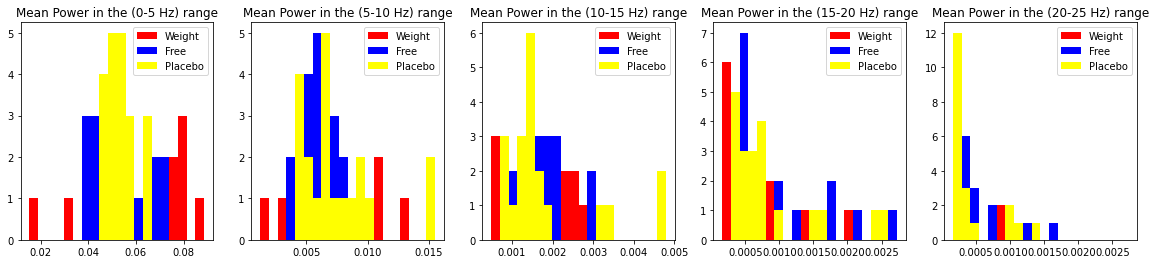

In [67]:
concfir = wfir+ffir+pfir
concsec = wsec+fsec+psec
concthi = wthi+fthi+pthi
concpfou = wfou+ffou+pfou
concpfif = wfou+ffou+pfou

plt.figure(figsize=[20,4])

plt.subplot(1,5,1)
plt.hist(wfir, color = 'red',stacked=True, range = (min(concfir), max(concfir)), bins = 20, label = 'Weight')
plt.hist(ffir, color = 'blue',stacked=True, range = (min(concfir), max(concfir)), bins = 20, label = 'Free')
plt.hist(pfir, color = 'yellow',stacked=True, range = (min(concfir), max(concfir)), bins = 20, label = 'Placebo')
plt.title('Mean Power in the (0-5 Hz) range')
plt.legend()

plt.subplot(1,5,2)
plt.hist(wsec, color = 'red',stacked=True, range = (min(concsec), max(concsec)), bins = 20, label = 'Weight')
plt.hist(fsec, color = 'blue',stacked=True, range = (min(concsec), max(concsec)), bins = 20, label = 'Free')
plt.hist(psec, color = 'yellow',stacked=True, range = (min(concsec), max(concsec)), bins = 20, label = 'Placebo')
plt.title('Mean Power in the (5-10 Hz) range')
plt.legend()

plt.subplot(1,5,3)
plt.hist(wthi, color = 'red',stacked=True, range = (min(concthi), max(concthi)), bins = 20, label = 'Weight')
plt.hist(fthi, color = 'blue',stacked=True, range = (min(concthi), max(concthi)), bins = 20, label = 'Free')
plt.hist(pthi, color = 'yellow',stacked=True, range = (min(concthi), max(concthi)), bins = 20, label = 'Placebo')
plt.title('Mean Power in the (10-15 Hz) range')
plt.legend()

plt.subplot(1,5,4)
plt.hist(wfou, color = 'red',stacked=True, range = (min(concpfou), max(concpfou)), bins = 20, label = 'Weight')
plt.hist(ffou, color = 'blue',stacked=True, range = (min(concpfou), max(concpfou)), bins = 20, label = 'Free')
plt.hist(pfou, color = 'yellow',stacked=True, range = (min(concpfou), max(concpfou)), bins = 20, label = 'Placebo')
plt.title('Mean Power in the (15-20 Hz) range')
plt.legend()

plt.subplot(1,5,5)
plt.hist(wfif, color = 'red',stacked=True, range = (min(concpfif), max(concpfif)), bins = 20, label = 'Weight')
plt.hist(ffif, color = 'blue',stacked=True, range = (min(concpfif), max(concpfif)), bins = 20, label = 'Free')
plt.hist(pfif, color = 'yellow',stacked=True, range = (min(concpfif), max(concpfif)), bins = 20, label = 'Placebo')
plt.title('Mean Power in the (20-25 Hz) range')
plt.legend()

As we can observe from the previous histograms, although there are small differences between groups, **it does not seem like these differences are significant** for them to be useful for the classification, which is the reason why we decided not to use these features for our decisor. This can make sense, as our first approach to use the spectrogram was done using the means of the 60 signals, so the variability for each person could be camouflaged.

- We also thought that taking into account the **NUMBER OF PEAKS** that we obtain for each signal after filtering, could be useful, considering that it seems intuitive that those people carrying weight should walk slower and/or be fatigued. However, once again, by analyzing the histogram we can see that they are all centered approximatelly around the same point, so **we do not think that it can be useful to classify.** Again, this makes sense as the pace for each person can be different, no matter the weight it is carrying. Also, as the length of time that was recorded for each subject was relatively small, it is intuitive, that there will not be significant differences from the beginning to the end of the experiment.

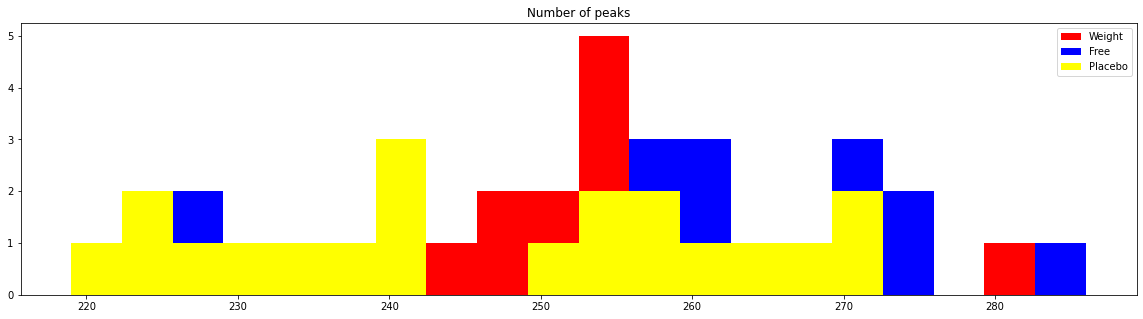

In [69]:
concplenpd = wpd+fpd+ppd

plt.figure(figsize=[20,5])
plt.hist(wpd, color = 'red',stacked=True, range = (min(concplenpd), max(concplenpd)), bins = 20, label = 'Weight')
plt.hist(fpd, color = 'blue',stacked=True, range = (min(concplenpd), max(concplenpd)), bins = 20, label = 'Free')
plt.hist(ppd, color = 'yellow',stacked=True, range = (min(concplenpd), max(concplenpd)), bins = 20, label = 'Placebo')
plt.title('Number of peaks')
plt.legend()

- Up to this moment we have been focusing on the X-axis of the accelerometer signal, as we have the intuition that it is the one that will give us the most important and useful information. However, after looking at the espectrograms of the **Y-axis** of the right foot signal as well as that for the left hip one, we saw **significant differences in the presence of the higher frequencies along the time axis.** For this reason we decided to use the mean power of the frequencies ranging from 15 to 25 Hz as another possible feature for the decisor.

Text(0.5, 0, 'Time [sec]')

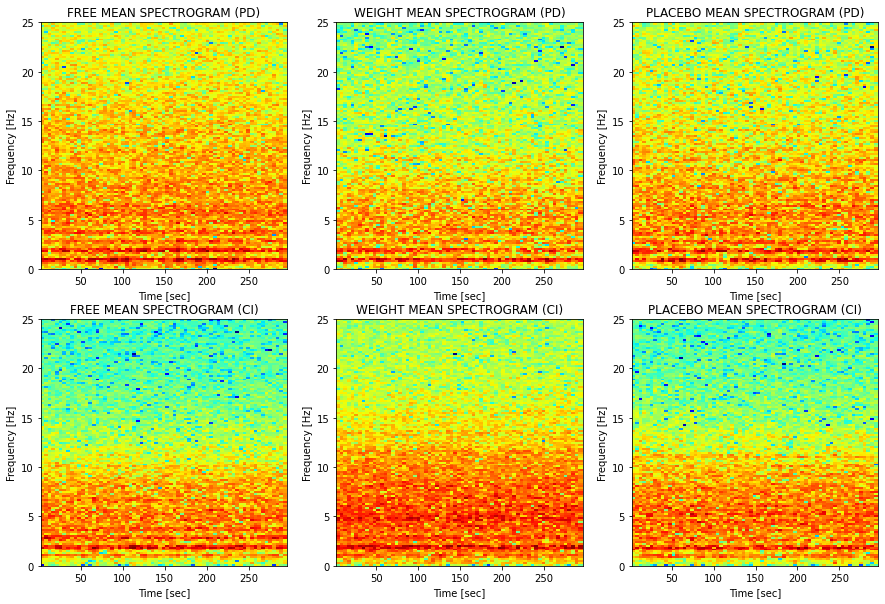

In [79]:
### we now obtain the mean signal for the y axis, from which we did the first visual inspection that lead us to use this axis.

listfree = [2,5,6,9,11,12,14,24,25,26,29,31,34,36,37,38,39,53, 58, 59]   
listy_pd = []
meany_pd_free = []
listy_ci = []
meany_ci_free = []
for i in range(0,15000):                
    for k in listfree:             
        a = Y_pd[k,:] # ------> Here is the difference from the previous code, as we now want the Y axis, not the X one.
        listy_pd.append(a[i])
        b = Y_ci[k,:]
        listy_ci.append(b[i])
    meany_pd_free.append(sum(listy_pd)/(len(listy_pd)))
    listy_pd = []
    meany_ci_free.append(sum(listy_ci)/(len(listy_ci)))
    listy_ci = []

    
listweight = [1, 3, 7,13,16,17,19,20,22,23,28,30,33,35,41,45,48,50,54,57]   
listy_pd = []
meany_pd_weight = []
listy_ci = []
meany_ci_weight = []
for i in range(0,15000):                
    for k in listweight:             
        a = Y_pd[k,:]
        listy_pd.append(a[i])
        b = Y_ci[k,:]
        listy_ci.append(b[i])
    meany_pd_weight.append(sum(listy_pd)/(len(listy_pd)))
    listy_pd = []
    meany_ci_weight.append(sum(listy_ci)/(len(listy_ci)))
    listy_ci = []

    
listplacebo = [0,4,8,10,15,18,21,27,32,40,42,43,44,46,47,49,51,52,55,56]  
# 1 5 9 11 16 19 22 28 33 41 43 44 45 47 48 50 52 53 56 57

listy_pd = []
meany_pd_placebo = []
listy_ci = []
meany_ci_placebo = []
for i in range(0,15000):                
    for k in listplacebo:              
        a = Y_pd[k,:]
        listy_pd.append(a[i])
        b = Y_ci[k,:]
        listy_ci.append(b[i])
    meany_pd_placebo.append(sum(listy_pd)/(len(listy_pd)))
    listy_pd = []
    meany_ci_placebo.append(sum(listy_ci)/(len(listy_ci)))
    listy_ci = []

    
###COMPUTING THE SPECTROGRAMS FOR THE MEAN    
Fy = np.array(meany_pd_free)
f1y, tt1y, Sxx1y = spectrogram(Fy, fs = 50, nperseg = 250)
a = 0
for i in Sxx1y[0:24]:
    j = np.mean(i)
    a = a + j
    
Wy = np.array(meany_pd_weight)
f2y, tt2y, Sxx2y = spectrogram(Wy, fs = 50, nperseg = 250)
a = 0
for i in Sxx2y[0:24]:
    j = np.mean(i)
    a = a + j
    
Py = np.array(meany_pd_placebo)
f3y, tt3y, Sxx3y = spectrogram(Py, fs = 50, nperseg = 250)
a = 0
for i in Sxx3[0:24]:
    j = np.mean(i)
    a = a + j
    
Fyy = np.array(meany_ci_free)
f1yy, tt1yy, Sxx1yy = spectrogram(Fyy, fs = 50, nperseg = 250)
a = 0
for i in Sxx1yy[0:24]:
    j = np.mean(i)
    a = a + j
    
Wyy = np.array(meany_ci_weight)
f2yy, tt2yy, Sxx2yy = spectrogram(Wyy, fs = 50, nperseg = 250)
a = 0
for i in Sxx2yy[0:24]:
    j = np.mean(i)
    a = a + j
    
Pyy = np.array(meany_ci_placebo)
f3yy, tt3yy, Sxx3yy = spectrogram(Pyy, fs = 50, nperseg = 250)
a = 0
for i in Sxx3yy[0:24]:
    j = np.mean(i)
    a = a + j
    
    
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
plt.pcolormesh(tt1y,f1y,10*np.log(Sxx1y),cmap='jet')
plt.title('FREE MEAN SPECTROGRAM (PD)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.subplot(2,3,2)
plt.pcolormesh(tt2y,f2y,10*np.log(Sxx2y),cmap='jet')
plt.title('WEIGHT MEAN SPECTROGRAM (PD)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.subplot(2,3,3)
plt.pcolormesh(tt3y,f3y,10*np.log(Sxx3y),cmap='jet')
plt.title('PLACEBO MEAN SPECTROGRAM (PD)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(2,3,4)
plt.pcolormesh(tt1yy,f1yy,10*np.log(Sxx1yy),cmap='jet')
plt.title('FREE MEAN SPECTROGRAM (CI)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.subplot(2,3,5)
plt.pcolormesh(tt2yy,f2yy,10*np.log(Sxx2yy),cmap='jet')
plt.title('WEIGHT MEAN SPECTROGRAM (CI)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.subplot(2,3,6)
plt.pcolormesh(tt3yy,f3yy,10*np.log(Sxx3yy),cmap='jet')
plt.title('PLACEBO MEAN SPECTROGRAM (CI)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

On the first row, we have plotted the spectrograms for the 3 groups and PD signal, and on the lower row, are the respective plots for CI signal. In both cases, it is easily differentiated the weight group from the other 2. Looking at them, we have taken the decision to only use on of them for the decisor, as using both will be redundant. Moreover, we specifically chose the spectrogram values for the PD signal, as in this case we can also see small differences between the free group and the placebo one, whereas in the CI signals, they look practically the same. The fact that the CI data is not as useful as that of PD is also demonstrated by the following histograms.

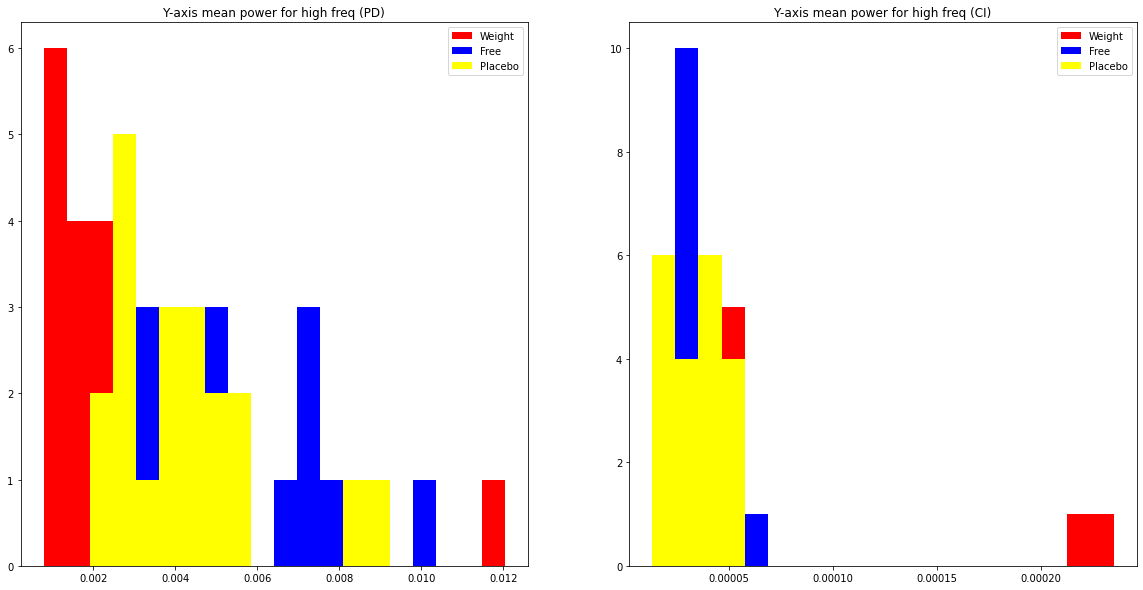

In [71]:
concplenpdy = wpdy+fpdy+ppdy
concplenciy = wciy+fciy+pciy

plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.hist(wpdy, color = 'red',stacked=True, range = (min(concplenpdy), max(concplenpdy)), bins = 20, label = 'Weight')
plt.hist(fpdy, color = 'blue',stacked=True, range = (min(concplenpdy), max(concplenpdy)), bins = 20, label = 'Free')
plt.hist(ppdy, color = 'yellow',stacked=True, range = (min(concplenpdy), max(concplenpdy)), bins = 20, label = 'Placebo')
plt.title('Y-axis mean power for high freq (PD)')
plt.legend()

plt.subplot(1,2,2)
plt.hist(wciy, color = 'red',stacked=True, range = (min(concplenciy), max(concplenciy)), bins = 20, label = 'Weight')
plt.hist(fciy, color = 'blue',stacked=True, range = (min(concplenciy), max(concplenciy)), bins = 20, label = 'Free')
plt.hist(pciy, color = 'yellow',stacked=True, range = (min(concplenciy), max(concplenciy)), bins = 20, label = 'Placebo')
plt.title('Y-axis mean power for high freq (CI)')
plt.legend()

The parameters that we decided to finally use to do the classification of the signals are: the mean and standard deviation of the differences list, the spectral density of acceleration of the signal, and the mean power of the high frequencies for the PD signals along the time domain in the Y axis, since these features have shown to be the most effective and differentiating ones.

All this information is reflected in the following function that we use to obtain all the features from the training signals that will form our decisor. Within the function, we also included those values that we do not end up using for the classification, because we still need the data to plot the histograms we used beforehand. 

**---------------------------------------------------------------------------------------------------------------------------**


# RUN HERE UNTIL THE END


**---------------------------------------------------------------------------------------------------------------------------**

In [41]:
def picudos(señal):
    
    p1 = 'C:\\Users\\Hugo\\DESKTOP\\TERCERO\\Segundo\\PSP\\CHALLENGE\\Data\\Training\\'
    p2 = '\\PD.txt'
    p3 = '\\CI.txt'
    pathpd = p1+str(señal)+p2
    pathci = p1+str(señal)+p3
    PD = np.loadtxt(pathpd)
    CI = np.loadtxt(pathci)
    
    t = np.linspace(0,60*5,15000) 
    x = []
    pdy = []
    for i in PD :
        np.split(i,3)
        x.append(i[0]) 
        pdy.append(i[1])
    y = []
    ciy = []
    for i in CI :
        np.split(i,3)
        y.append(i[0])
        ciy.append(i[1])

    PD_s = (smooth(x,window_len=10,window='flat'))
    CI_s = (smooth(y,window_len=10,window='flat'))

    b_bp= signal.firwin(64,[0.3, 4.1],pass_zero=False,fs=50)     
    PD_sbp = signal.filtfilt(b_bp,1,PD_s)         
    CI_sbp = signal.filtfilt(b_bp,1,CI_s) 

    PSD_welchnxpd = []   
    f_welch, Pxx_welch = signal.welch(PD_sbp,window ='hamming',nperseg = 128 ,nfft = 1024, fs = 50)   
    PSD_welchnxpd.append(Pxx_welch)    
    PSD_welchnxpd = np.array(PSD_welchnxpd) 
    peaksperiod,_ = find_peaks(PSD_welchnxpd[0])

    PSD_welchnxci = []   
    f_welch, Pxx_welch = signal.welch(CI_sbp,window ='hamming',nperseg = 128 ,nfft = 1024, fs = 50)   
    PSD_welchnxci.append(Pxx_welch)    
    PSD_welchnxci = np.array(PSD_welchnxci) 
    peaksperiodci,_ = find_peaks(PSD_welchnxci[0])

    a = zip(f_welch,PSD_welchnxpd.T)
    k= []
    for i,e in a:
        if e == max(PSD_welchnxpd.T):
            k.append(i)

    b = zip(f_welch,PSD_welchnxci.T)
    j= []
    for i,e in b:
        if e == max(PSD_welchnxci.T):
            j.append(i)

    Dpd = (1/(k[0]))*50
    Dci = (1/(j[0]))*50
    peakspd,_ = find_peaks(PD_sbp,distance=Dpd)
    peaksci,_ = find_peaks(CI_sbp,distance=Dci)

    amplitudespd = []
    for e in peakspd:
        amplitudespd.append(PD_sbp[e])

    timeamppd = zip(amplitudespd,peakspd)    

    realamppd = []
    for e,i in timeamppd:
        if statistics.mean(amplitudespd) - statistics.stdev(amplitudespd) < e:
            realamppd.append(i)

    amplitudesci = []
    for e in peaksci:
        amplitudesci.append(CI_sbp[e])

        timeampci = zip(amplitudesci,peaksci)    

    realampci = []
    for e,i in timeampci:
        if statistics.mean(amplitudesci) - statistics.stdev(amplitudesci) < e:
            realampci.append(i)

    pdtimes = []
    citimes = []
    for i in realamppd:
        pdtimes.append(t[i])
    for i in realampci:
        citimes.append(t[i])

    if len(citimes) > len(pdtimes):
        for i in range (0, (len(citimes) - len(pdtimes))):
            pdtimes.append(0)

    if len(pdtimes) > len(citimes):
        for i in range (0, (len(pdtimes) - len(citimes))):
            citimes.append(0)

    
    thezip = zip(pdtimes,citimes)
    pdtimesez = []
    citimesez = []

    for e in pdtimes:
        listddd = []
        for i in citimes:
            listddd.append(np.abs(e - i))
        val, idx = min((val, idx) for (idx, val) in enumerate(listddd))
        citimesez.append(citimes[idx])
        pdtimesez.append(e)
    
    differentimesez = [np.abs(a_i - b_i) for a_i, b_i in zip(pdtimesez, citimesez)]
    
    powa = sum(PSD_welchnxpd.T)/len(PSD_welchnxpd.T)
    
    X = np.array(x)
    f1, tt1, Sxx1 = spectrogram(X, fs = 50, nperseg = 250)
    a = 0
    for i in Sxx1[0:24]:
        j = np.mean(i)
        a = a + j
    b = 0
    for i in Sxx1[25:49]:
        j = np.mean(i)
        b = b + j
    c = 0
    for i in Sxx1[50:74]:
        j = np.mean(i)
        c = c + j
    d = 0
    for i in Sxx1[75:99]:
        j = np.mean(i)
        d = d + j
    e = 0
    for i in Sxx1[100:126]:
        j = np.mean(i)
        e = e + j   
    mediafirst = a/(25)
    mediasecond = b/(25)
    mediathird = c/(25)
    mediafourth = d/(25)
    mediafifth = e/(26)
    
    PDy = np.array(pdy)
    f1, tt1, Sxx1 = spectrogram(PDy, fs = 50, nperseg = 250)
    a = 0
    for i in Sxx1[75:126]:
        j = np.mean(i)
        a = a + j
    CIy = np.array(ciy)
    f2, tt2, Sxx2 = spectrogram(CIy, fs = 50, nperseg = 250)
    b = 0
    for i in Sxx2[75:126]:
        j = np.mean(i)
        b = b + j
    meanpdy= a/50
    meanciy= b/50
    
    return (statistics.stdev(differentimesez),statistics.mean(differentimesez), powa[0], len(realamppd), mediafirst, mediasecond, mediathird, mediafourth, mediafifth, meanpdy, meanciy)

Having defined the function with which we want to obtain the parameters to study, we will do so will the 60 training signals divided in the 3 groups.

Knowing the classification of the training signals, we created 3 lists, one per group, and we will be calling the funciton for each element of those lists, and storing the information obtained in separate lists, that we will later use for the decisor.

In [10]:
listweight = [1, 3, 7,13,16,17,19,20,22,23,28,30,33,35,41,45,48,50,54,57]  

weightstd= []
weightmean = []
wpowa = []
wpd= []
wfir= []
wsec = []
wthi = []
wfou = []
wfif = []
wpdy=[]
wciy=[]

for j in listweight:
    a = j+1
    weightstd.append(picudos(a)[0])
    weightmean.append(picudos(a)[1])    
    wpowa.append(picudos(a)[2])
    wpd.append(picudos(a)[3])
    wfir.append(picudos(a)[4])
    wsec.append(picudos(a)[5])    
    wthi.append(picudos(a)[6])
    wfou.append(picudos(a)[7])
    wfif.append(picudos(a)[8])
    wpdy.append(picudos(a)[9])
    wciy.append(picudos(a)[10])

In [11]:
listfree = [2,5,6,9,11,12,14,24,25,26,29,31,34,36,37,38,39,53, 58, 59] 

freestd= []
freemean = []
fpowa = []
fpd = []
ffir= []
fsec = []
fthi = []
ffou = []
ffif = []
fpdy=[]
fciy=[]

for j in listfree:
    a = j+1
    freestd.append(picudos(a)[0])
    freemean.append(picudos(a)[1])    
    fpowa.append(picudos(a)[2])
    fpd.append(picudos(a)[3])
    ffir.append(picudos(a)[4])
    fsec.append(picudos(a)[5])    
    fthi.append(picudos(a)[6])
    ffou.append(picudos(a)[7])
    ffif.append(picudos(a)[8])
    fpdy.append(picudos(a)[9])
    fciy.append(picudos(a)[10])

In [12]:
listplacebo = [0,4,8,10,15,18,21,27,32,40,42,43,44,46,47,49,51,52,55,56]  

pstd= []
pmean = []
pmaxpd= []
pmaxci = []
ppowa = []
ppd =[]
pfir= []
psec = []
pthi = []
pfou = []
pfif = []
ppdy=[]
pciy=[]

for j in listplacebo:
    a = j+1
    pstd.append(picudos(a)[0])
    pmean.append(picudos(a)[1])    
    ppowa.append(picudos(a)[2])
    ppd.append(picudos(a)[3])
    pfir.append(picudos(a)[4])
    psec.append(picudos(a)[5])    
    pthi.append(picudos(a)[6])
    pfou.append(picudos(a)[7])
    pfif.append(picudos(a)[8])
    ppdy.append(picudos(a)[9])
    pciy.append(picudos(a)[10])

Although our function returns 11 values, as we have explained previously, the decisor will only use four of them, being these the standard deviation and mean of the time differences between the CI and PD signals, the spectral density of acceleration and the average power of the higher frequencies of the spectrogram of the PD signals in the Y axis.

In [13]:
### to create the matrix of features (cosa) for the decisor we concatenate the lists of values in a given order (placcebo, 
### weight and free), so that we can afterwards create the vector corresponding to the classification of each signal (indexes) 
### in that same order. This matrix of features, along with the vector of classification will be ussed to fit the detector, so 
### we can then use it for the test signals.

st = np.concatenate((pstd, weightstd, freestd))
means = np.concatenate((pmean, weightmean, freemean))
powaa = np.concatenate((ppowa, wpowa, fpowa))
pdyy=np.concatenate((ppdy, wpdy, fpdy))

cosa = np.zeros((60,4))
cosa[:,0]=st
cosa[:,1]=means
cosa[:,2]=powaa
cosa[:,3]=pdyy

indexes = np.zeros((60,1))
indexes[0:20] = 2 #----> Placebo
indexes[20:40] = 1 #----> Weight
#indexes[40:60] = 0 #----> Free

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
### As from the 60 training signals, 20 of them correspond to each group, the prior probabilites for each one is one third
Prior_0 = 1/3
Prior_1 = 1/3
Prior_2 = 1/3

nb_detector = GaussianNB(priors = [Prior_0,Prior_1,Prior_2])

nb_detector.fit(cosa,indexes.ravel()) # When fitting the Naive Bayes detector, it calculates the mean and varaiance for each 
                                      # feature, assuming they follow a gaussian distribution.

GaussianNB(priors=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
           var_smoothing=1e-09)

In [16]:
D = nb_detector.predict(cosa)

print('ACC = %.2f'%np.mean(D == indexes.ravel()))

ACC = 0.72


The same function we defined previosuly for the training of the detector, is going to be defined, now for the test signals.

In [42]:
def picudost(señal):
    p1 = 'C:\\Users\\Hugo\\DESKTOP\\TERCERO\\Segundo\\PSP\\CHALLENGE\\Data\\Test\\'
    p2 = '\\PD.txt'
    p3 = '\\CI.txt'
    pathpd = p1+str(señal)+p2
    pathci = p1+str(señal)+p3
    PD = np.loadtxt(pathpd)
    CI = np.loadtxt(pathci)

    t = np.linspace(0,60*5,15000) # Time related in samples as the same number of x's signals , y and z.
    x = []
    pdy = []
    for i in PD :
        np.split(i,3)
        x.append(i[0]) 
        pdy.append(i[1])
    y = []
    ciy = []
    for i in CI :
        np.split(i,3)
        y.append(i[0])
        ciy.append(i[1])
        
    PD_s = (smooth(x,window_len=10,window='flat'))
    CI_s = (smooth(y,window_len=10,window='flat'))


    b_bp= signal.firwin(64,[0.3, 4.1],pass_zero=False,fs=50)     
    PD_sbp = signal.filtfilt(b_bp,1,PD_s)         
    CI_sbp = signal.filtfilt(b_bp,1,CI_s) 


    PSD_welchnxpd = []   
    f_welch, Pxx_welch = signal.welch(PD_sbp,window ='hamming',nperseg = 128 ,nfft = 1024, fs = 50)   
    PSD_welchnxpd.append(Pxx_welch)    
    PSD_welchnxpd = np.array(PSD_welchnxpd) 
    peaksperiod,_ = find_peaks(PSD_welchnxpd[0])

    PSD_welchnxci = []   
    f_welch, Pxx_welch = signal.welch(CI_sbp,window ='hamming',nperseg = 128 ,nfft = 1024, fs = 50)   
    PSD_welchnxci.append(Pxx_welch)    
    PSD_welchnxci = np.array(PSD_welchnxci) 
    peaksperiodci,_ = find_peaks(PSD_welchnxci[0])

    a = zip(f_welch,PSD_welchnxpd.T)
    k= []
    for i,e in a:
        if e == max(PSD_welchnxpd.T):
            k.append(i)


    b = zip(f_welch,PSD_welchnxci.T)
    j= []
    for i,e in b:
        if e == max(PSD_welchnxci.T):
            j.append(i)


    Dpd = (1/(k[0]))*50
    Dci = (1/(j[0]))*50
    peakspd,_ = find_peaks(PD_sbp,distance=Dpd)
    peaksci,_ = find_peaks(CI_sbp,distance=Dci)

    amplitudespd = []
    for e in peakspd:
        amplitudespd.append(PD_sbp[e])

    timeamppd = zip(amplitudespd,peakspd)    

    realamppd = []
    for e,i in timeamppd:
        if statistics.mean(amplitudespd) - statistics.stdev(amplitudespd) < e:
            realamppd.append(i)



    amplitudesci = []
    for e in peaksci:
        amplitudesci.append(CI_sbp[e])

        timeampci = zip(amplitudesci,peaksci)    

    realampci = []
    for e,i in timeampci:
        if statistics.mean(amplitudesci) - statistics.stdev(amplitudesci) < e:
            realampci.append(i)

    pdtimes = []
    citimes = []
    for i in realamppd:
        pdtimes.append(t[i])
    for i in realampci:
        citimes.append(t[i])

    if len(citimes) > len(pdtimes):
        for i in range (0, (len(citimes) - len(pdtimes))):
            pdtimes.append(0)

    if len(pdtimes) > len(citimes):
        for i in range (0, (len(pdtimes) - len(citimes))):
            citimes.append(0)

    thezip = zip(pdtimes,citimes)
    pdtimesez = []
    citimesez = []

    for e in pdtimes:
        listddd = []
        for i in citimes:
            listddd.append(np.abs(e - i))
        val, idx = min((val, idx) for (idx, val) in enumerate(listddd))
        citimesez.append(citimes[idx])
        pdtimesez.append(e)

    powa = sum(PSD_welchnxpd.T)/len(PSD_welchnxpd.T)
    
    differentimesez = [np.abs(a_i - b_i) for a_i, b_i in zip(pdtimesez, citimesez)]

    PDy = np.array(pdy)
    f1, tt1, Sxx1 = spectrogram(PDy, fs = 50, nperseg = 250)
    a = 0
    for i in Sxx1[75:126]:
        j = np.mean(i)
        a = a + j
    meanpdy= a/50
    
    return (statistics.stdev(differentimesez),statistics.mean(differentimesez), powa[0], meanpdy)

We now call the function for the 30 test signals, and introduce the matrix we create with the obtained features to the decisor.

In [43]:
latest = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]  

lastd= []
lamean = []
lapowa = []
lameanpdy=[]
for j in latest:
    a = j
    lastd.append(picudost(a)[0])
    lamean.append(picudost(a)[1])    
    lapowa.append(picudost(a)[2])
    lameanpdy.append(picudost(a)[3])
    
    
lacosa = np.zeros((30,4))
lacosa[:,0]=lastd
lacosa[:,1]=lamean
lacosa[:,2]=lapowa
lacosa[:,3]=lameanpdy


K = nb_detector.predict(lacosa)
print(K)

[2. 1. 2. 1. 2. 0. 0. 0. 2. 2. 1. 1. 1. 2. 0. 2. 1. 2. 2. 2. 0. 1. 0. 1.
 2. 0. 1. 2. 1. 2.]


In [75]:
'''
With this code we automatically generate the csv that will be uploaded to kaggle. Credits to Miguel Ángel
'''
matrix_to_save=(np.asarray(K,dtype=int)).reshape((30,1))
ids=np.arange(1,31).reshape((30,1))
matrix_to_save = np.hstack((ids,matrix_to_save))
print(matrix_to_save.shape)
save_path = 'C:\\Users\\Hugo\\DESKTOP\\TERCERO\\Segundo\\PSP\\CHALLENGE\\definitvor.csv'
with open(save_path, 'wb') as f:
    f.write(b'Id,Category\n')
    np.savetxt(f, matrix_to_save.astype(int), fmt='%i', delimiter=",")

(30, 2)
